In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
df = pd.read_csv("data/CreditScoring.csv")
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


### Data Description

* status: whether the customer managed to pay back the loan (1) or not (2)
* seniority: job experience in years
* home: type of homeownership: renting (1), a homeowner (2), and others
* time: period planned for the loan (in months)
* age: age of the client
* marital [status]: single (1), married (2), and others
* records: whether the client has any previous records: no (1), yes (2) (It’s not
clear from the dataset description what kind of records we have in this column.
For the purposes of this project, we may assume that it’s about records in the
bank’s database.)
* job: type of job: full-time (1), part-time (2), and others
* expenses: how much the client spends per month
* income: how much the client earns per month
* assets: total worth of all the assets of the client
* debt: amount of credit debt
* amount: requested amount of the loan
* price: price of an item the client wants to buy

### Data cleaning

In [94]:
df.columns = df.columns.str.lower()

In [95]:
status_values = {
    1: "ok",
    2: 'default',
    0: 'unk'
}

df.status = df.status.map(status_values)
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,1,60,30,2,1,3,73,129,0,0,800,846
1,ok,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,default,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,ok,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,ok,0,1,36,26,1,1,1,46,107,0,0,310,910


In [96]:
home_values = {
1: 'rent',
2: 'owner',
3: 'private',
4: 'ignore',
5: 'parents',
6: 'other',
0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
1: 'single',
2: 'married',
3: 'widow',
4: 'separated',
5: 'divorced',
0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
1: 'no',
2: 'yes',
0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
1: 'fixed',
2: 'parttime',
3: 'freelance',
4: 'others',
0: 'unk'
}
df.job = df.job.map(job_values)

df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [97]:
# Check summary stats

df.describe().round().T

,count,mean,std,min,25%,50%,75%,max
seniority,4455.0,8.0,8.0,0.0,2.0,5.0,12.0,48.0
time,4455.0,46.0,15.0,6.0,36.0,48.0,60.0,72.0
age,4455.0,37.0,11.0,18.0,28.0,36.0,45.0,68.0
expenses,4455.0,56.0,20.0,35.0,35.0,51.0,72.0,180.0
income,4455.0,763317.0,8703625.0,0.0,80.0,120.0,166.0,99999999.0
assets,4455.0,1060341.0,10217569.0,0.0,0.0,3500.0,6000.0,99999999.0
debt,4455.0,404382.0,6344253.0,0.0,0.0,0.0,0.0,99999999.0
amount,4455.0,1039.0,475.0,100.0,700.0,1000.0,1300.0,5000.0
price,4455.0,1463.0,628.0,105.0,1118.0,1400.0,1692.0,11140.0


In [98]:
# Fixing missing values (99999999)
# Replacing with nan
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace = 99999999, value = np.nan)

In [99]:
df.describe().round().T

,count,mean,std,min,25%,50%,75%,max
seniority,4455.0,8.0,8.0,0.0,2.0,5.0,12.0,48.0
time,4455.0,46.0,15.0,6.0,36.0,48.0,60.0,72.0
age,4455.0,37.0,11.0,18.0,28.0,36.0,45.0,68.0
expenses,4455.0,56.0,20.0,35.0,35.0,51.0,72.0,180.0
income,4421.0,131.0,86.0,0.0,80.0,120.0,165.0,959.0
assets,4408.0,5403.0,11573.0,0.0,0.0,3000.0,6000.0,300000.0
debt,4437.0,343.0,1246.0,0.0,0.0,0.0,0.0,30000.0
amount,4455.0,1039.0,475.0,100.0,700.0,1000.0,1300.0,5000.0
price,4455.0,1463.0,628.0,105.0,1118.0,1400.0,1692.0,11140.0


In [100]:
df.status.value_counts()

ok         3200
default    1254
unk           1
Name: status, dtype: int64

In [101]:
df = df.loc[df.status != 'unk', :]

In [102]:
df.status.value_counts()

ok         3200
default    1254
Name: status, dtype: int64

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4454 entries, 0 to 4454
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   status     4454 non-null   object 
 1   seniority  4454 non-null   int64  
 2   home       4454 non-null   object 
 3   time       4454 non-null   int64  
 4   age        4454 non-null   int64  
 5   marital    4454 non-null   object 
 6   records    4454 non-null   object 
 7   job        4454 non-null   object 
 8   expenses   4454 non-null   int64  
 9   income     4420 non-null   float64
 10  assets     4407 non-null   float64
 11  debt       4436 non-null   float64
 12  amount     4454 non-null   int64  
 13  price      4454 non-null   int64  
dtypes: float64(3), int64(6), object(5)
memory usage: 522.0+ KB


In [104]:
cat_cols = df.columns[(df.dtypes == "object")].to_list()
cat_cols

['status', 'home', 'marital', 'records', 'job']

In [105]:
num_cols = df.columns[(df.dtypes == "int64")|(df.dtypes == "float64")].to_list()
num_cols

['seniority',
 'time',
 'age',
 'expenses',
 'income',
 'assets',
 'debt',
 'amount',
 'price']

### Dataset preparation

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
from random import random


df_train_full, df_test = train_test_split(df,
                    test_size=0.2,
                    random_state=11)

df_train, df_val = train_test_split(df_train_full,
                    test_size = 0.25,
                    random_state = 11)

In [108]:
len(df_train), len(df_val), len(df_test)

(2672, 891, 891)

In [109]:
y_train = (df_train.status == "default").values
y_test = (df_test.status == "default").values
y_val = (df_val.status == "default").values

In [110]:
del df_train["status"]
del df_val["status"]

In [111]:
df_train.isna().sum()

seniority     0
home          0
time          0
age           0
marital       0
records       0
job           0
expenses      0
income       25
assets       30
debt         11
amount        0
price         0
dtype: int64

In [112]:
df_train = df_train.fillna(0)
df_val = df_val.fillna(0)

### One hot encoding

In [113]:
dict_train = df_train.to_dict(orient = "records")
dict_val = df_val.to_dict(orient = "records")

dict_train

[{'seniority': 10,
  'home': 'owner',
  'time': 36,
  'age': 36,
  'marital': 'married',
  'records': 'no',
  'job': 'freelance',
  'expenses': 75,
  'income': 0.0,
  'assets': 10000.0,
  'debt': 0.0,
  'amount': 1000,
  'price': 1400},
 {'seniority': 6,
  'home': 'parents',
  'time': 48,
  'age': 32,
  'marital': 'single',
  'records': 'yes',
  'job': 'fixed',
  'expenses': 35,
  'income': 85.0,
  'assets': 0.0,
  'debt': 0.0,
  'amount': 1100,
  'price': 1330},
 {'seniority': 1,
  'home': 'parents',
  'time': 48,
  'age': 40,
  'marital': 'married',
  'records': 'no',
  'job': 'fixed',
  'expenses': 75,
  'income': 121.0,
  'assets': 0.0,
  'debt': 0.0,
  'amount': 1320,
  'price': 1600},
 {'seniority': 1,
  'home': 'parents',
  'time': 48,
  'age': 23,
  'marital': 'single',
  'records': 'no',
  'job': 'parttime',
  'expenses': 35,
  'income': 72.0,
  'assets': 0.0,
  'debt': 0.0,
  'amount': 1078,
  'price': 1079},
 {'seniority': 5,
  'home': 'owner',
  'time': 36,
  'age': 46,
  '

In [114]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse = False)
X_train = dv.fit_transform(dict_train)
X_val = dv.transform(dict_val)

## Decision trees

In [115]:
from sklearn.tree import DecisionTreeClassifier

In [116]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [118]:
from sklearn.metrics import roc_auc_score

In [121]:
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

1.0

In [122]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.6508591460608849

In [124]:
# limiting the depth of the tree

dt = DecisionTreeClassifier(max_depth = 2)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [127]:
from sklearn.tree import export_text

tree_text = export_text(dt, feature_names = dv.feature_names_)
print(tree_text)

|--- records=no <= 0.50
|   |--- seniority <= 6.50
|   |   |--- class: True
|   |--- seniority >  6.50
|   |   |--- class: False
|--- records=no >  0.50
|   |--- job=parttime <= 0.50
|   |   |--- class: False
|   |--- job=parttime >  0.50
|   |   |--- class: True



In [125]:
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

0.7054989859726213

In [126]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.6685264343319367

### Parameter Tuning for Decision Tree

In [131]:
# Tune for depth
depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]

for depth in depths:
    dt = DecisionTreeClassifier(max_depth = depth)
    dt.fit(X_train, y_train)
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print(f"Depth: {depth}--> auc: {auc:.3f}")

Depth: 1--> auc: 0.606
Depth: 2--> auc: 0.669
Depth: 3--> auc: 0.739
Depth: 4--> auc: 0.761
Depth: 5--> auc: 0.767
Depth: 6--> auc: 0.757
Depth: 10--> auc: 0.682
Depth: 15--> auc: 0.670
Depth: 20--> auc: 0.651
Depth: None--> auc: 0.648


In [133]:
# Tune for depth
depths = [4,5,6]
min_leaf_size = [1, 5, 10, 15, 20, 50, 100, 200]


for d in depths:
    for s in min_leaf_size: 
        dt = DecisionTreeClassifier(max_depth = depth,
                                    min_samples_leaf=s)
        dt.fit(X_train, y_train)    
        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print(f"Depth: {d} --> Min Sample leaf: {s} --> auc: {auc:.3f}")

Depth: 4 --> Min Sample leaf: 1 --> auc: 0.658
Depth: 4 --> Min Sample leaf: 5 --> auc: 0.718
Depth: 4 --> Min Sample leaf: 10 --> auc: 0.761
Depth: 4 --> Min Sample leaf: 15 --> auc: 0.788
Depth: 4 --> Min Sample leaf: 20 --> auc: 0.781
Depth: 4 --> Min Sample leaf: 50 --> auc: 0.778
Depth: 4 --> Min Sample leaf: 100 --> auc: 0.779
Depth: 4 --> Min Sample leaf: 200 --> auc: 0.768
Depth: 5 --> Min Sample leaf: 1 --> auc: 0.665
Depth: 5 --> Min Sample leaf: 5 --> auc: 0.716
Depth: 5 --> Min Sample leaf: 10 --> auc: 0.760
Depth: 5 --> Min Sample leaf: 15 --> auc: 0.788
Depth: 5 --> Min Sample leaf: 20 --> auc: 0.783
Depth: 5 --> Min Sample leaf: 50 --> auc: 0.776
Depth: 5 --> Min Sample leaf: 100 --> auc: 0.780
Depth: 5 --> Min Sample leaf: 200 --> auc: 0.768
Depth: 6 --> Min Sample leaf: 1 --> auc: 0.668
Depth: 6 --> Min Sample leaf: 5 --> auc: 0.723
Depth: 6 --> Min Sample leaf: 10 --> auc: 0.759
Depth: 6 --> Min Sample leaf: 15 --> auc: 0.787
Depth: 6 --> Min Sample leaf: 20 --> auc: 

In [136]:
dt = DecisionTreeClassifier(max_depth=6,
                            min_samples_leaf=15)
dt.fit(X_train, y_train)

y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

0.8612437327474509

In [137]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7856948245380349

### Random Forest

In [138]:
from sklearn.ensemble import RandomForestClassifier

In [143]:
rf = RandomForestClassifier(n_estimators=10, random_state = 3)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=3)

In [144]:
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7811145285897654

In [146]:
aucs = []
for i in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=i, random_state = 3)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print(f"n_estimators: {i} --> auc: {auc:.3f}")
    aucs.append(auc)

n_estimators: 10 --> auc: 0.781
n_estimators: 20 --> auc: 0.801
n_estimators: 30 --> auc: 0.813
n_estimators: 40 --> auc: 0.815
n_estimators: 50 --> auc: 0.816
n_estimators: 60 --> auc: 0.817
n_estimators: 70 --> auc: 0.818
n_estimators: 80 --> auc: 0.818
n_estimators: 90 --> auc: 0.820
n_estimators: 100 --> auc: 0.819
n_estimators: 110 --> auc: 0.819
n_estimators: 120 --> auc: 0.821
n_estimators: 130 --> auc: 0.822
n_estimators: 140 --> auc: 0.822
n_estimators: 150 --> auc: 0.820
n_estimators: 160 --> auc: 0.820
n_estimators: 170 --> auc: 0.819
n_estimators: 180 --> auc: 0.820
n_estimators: 190 --> auc: 0.820
n_estimators: 200 --> auc: 0.820


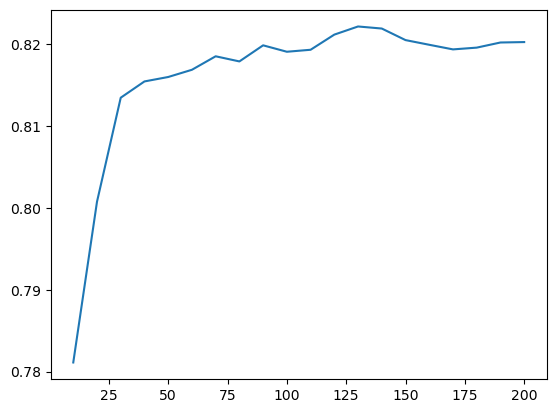

In [147]:
plt.plot(range(10, 201, 10), aucs)

### Parameters tuning for random forest

In [151]:
all_aucs = {}

for depth in [5, 10, 20]:
    aucs = []

    for i in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=i,
                                    max_depth = depth,
                                    random_state = 3)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print(f"n_estimators: {i} --> auc: {auc:.3f}")
        aucs.append(auc)

        all_aucs[depth] = aucs
        print()

n_estimators: 10 --> auc: 0.789

n_estimators: 20 --> auc: 0.794

n_estimators: 30 --> auc: 0.802

n_estimators: 40 --> auc: 0.802

n_estimators: 50 --> auc: 0.806

n_estimators: 60 --> auc: 0.805

n_estimators: 70 --> auc: 0.807

n_estimators: 80 --> auc: 0.806

n_estimators: 90 --> auc: 0.807

n_estimators: 100 --> auc: 0.805

n_estimators: 110 --> auc: 0.805

n_estimators: 120 --> auc: 0.807

n_estimators: 130 --> auc: 0.807

n_estimators: 140 --> auc: 0.806

n_estimators: 150 --> auc: 0.806

n_estimators: 160 --> auc: 0.807

n_estimators: 170 --> auc: 0.807

n_estimators: 180 --> auc: 0.807

n_estimators: 190 --> auc: 0.807

n_estimators: 200 --> auc: 0.807

n_estimators: 10 --> auc: 0.796

n_estimators: 20 --> auc: 0.817

n_estimators: 30 --> auc: 0.818

n_estimators: 40 --> auc: 0.822

n_estimators: 50 --> auc: 0.821

n_estimators: 60 --> auc: 0.823

n_estimators: 70 --> auc: 0.823

n_estimators: 80 --> auc: 0.821

n_estimators: 90 --> auc: 0.821

n_estimators: 100 --> auc: 0.822

In [150]:
all_aucs

{5: [0.7886827637984064,
  0.7939381463272868,
  0.802123949528953,
  0.8023025598798769,
  0.8061653871303673,
  0.8051784892591606,
  0.8068253372405608,
  0.806189605483035,
  0.8065044440677145,
  0.8052450897289966,
  0.8051603254946599,
  0.8070614661790706,
  0.8067103000653896,
  0.8060140224261946,
  0.8060624591315299,
  0.8072612675885786,
  0.8069282652393983,
  0.8071583395897411,
  0.8071038482962389,
  0.8069101014748976],
 10: [0.7963811726526361,
  0.8174814124143275,
  0.8181413625245211,
  0.8217801700128358,
  0.821211038725146,
  0.8225430481218667,
  0.8230274151752199,
  0.8207629992007942,
  0.8212413116659805,
  0.8215137681334915,
  0.8222584824780219,
  0.8234209634060691,
  0.8225127751810322,
  0.8227610132958756,
  0.8214653314281563,
  0.8213563488411517,
  0.8215258773098254,
  0.8224159017703616,
  0.8231787798793926,
  0.8236873652854133],
 20: [0.7903810757792256,
  0.7997989876728585,
  0.8142149620982781,
  0.8189314862803032,
  0.8187044392240439,


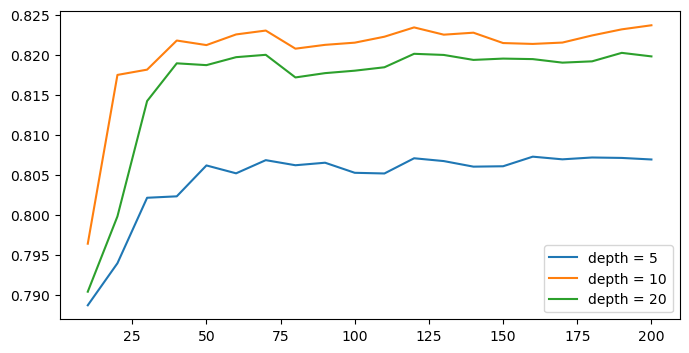

In [152]:
num_trees = list(range(10, 201, 10))

fig, ax = plt.subplots(figsize = (8, 4))

ax.plot(num_trees, all_aucs[5], label = 'depth = 5')
ax.plot(num_trees, all_aucs[10], label = 'depth = 10')
ax.plot(num_trees, all_aucs[20], label = 'depth = 20')
ax.legend()

In [153]:
all_aucs = {}
for m in [3, 5, 10]:
    print('min_samples_leaf: %s' % m)
    aucs = []

    for i in range(10, 201, 20):
        rf = RandomForestClassifier(n_estimators=i, max_depth=10,
        min_samples_leaf=m, random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s -> %.3f' % (i, auc))
        aucs.append(auc)
        all_aucs[m] = aucs
        print()

min_samples_leaf: 3
10 -> 0.811

30 -> 0.823

50 -> 0.823

70 -> 0.822

90 -> 0.823

110 -> 0.823

130 -> 0.824

150 -> 0.825

170 -> 0.825

190 -> 0.825

min_samples_leaf: 5
10 -> 0.813

30 -> 0.818

50 -> 0.821

70 -> 0.822

90 -> 0.822

110 -> 0.825

130 -> 0.825

150 -> 0.825

170 -> 0.825

190 -> 0.826

min_samples_leaf: 10
10 -> 0.810

30 -> 0.822

50 -> 0.822

70 -> 0.819

90 -> 0.820

110 -> 0.820

130 -> 0.821

150 -> 0.820

170 -> 0.820

190 -> 0.820



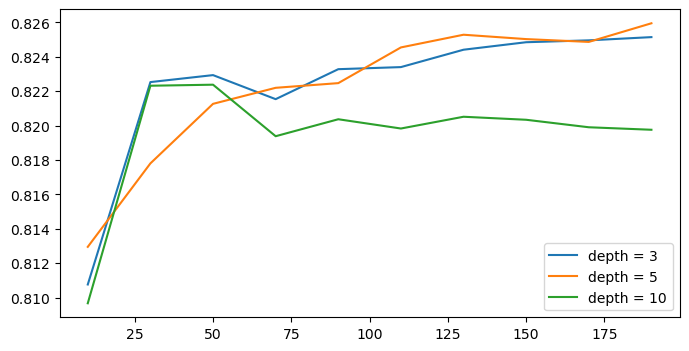

In [155]:
num_trees = list(range(10, 201, 20))

fig, ax = plt.subplots(figsize = (8, 4))

ax.plot(num_trees, all_aucs[3], label = 'depth = 3')
ax.plot(num_trees, all_aucs[5], label = 'depth = 5')
ax.plot(num_trees, all_aucs[10], label = 'depth = 10')
ax.legend()

In [166]:
# Max depth = 10, min_leaf = 5

rf = RandomForestClassifier(n_estimators=200,
                            max_depth=10,
                            min_samples_leaf=5,
                            random_state=1)
rf.fit(X_train, y_train)
y_train_pred = rf.predict_proba(X_train)[:, 1]
print(f"train roc_auc: {roc_auc_score(y_train, y_train_pred):.2f}")

y_val_pred = rf.predict_proba(X_val)[:, 1]
print(f"val roc_auc: {roc_auc_score(y_val, y_val_pred):.2f}")

train roc_auc: 0.94
val roc_auc: 0.83


### Gradient Boosting